<center><font size="10">3804ICT/3031ICT/7031ICT Data Mining</font></center> <br>
<center><font size="8">Workshop/Lab Week 2</font></center> <br><br>
<center><font size="6">by Dr Can Wang</font></center> <br><br>
<center><font size="6">Trimester 2, 2021</font></center> <br>

# Activity Set 1: Find solutions to the following problems [<font color=red>Individual Activity</font>]
## 1. Data Exploration
### Question Set 1 (20 mins)
<p>Suppose that the data for analysis includes the attribute age. The age values for the data tuples are (in increasing order) (13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70). Given the data, answer the following questions:<br>
<ol>
    <li>What is the mean of the data? What is the median? What is the variance? (5 mins)</li><br>
    <li>Can you find the first quartile (Q1) and the third quartile (Q3) of the data? (3 mins)</li><br>
    <li>Give the five-number summary of the data. (2 mins)</li><br>
    <li>Please use Python with neccessary libraries to validate your results of (1), (2), and (3) below. Also, use "matplotlib" to draw a box plot of the age data. (10 mins)</li><br>
</ol>
</p>

In [14]:
# import neccessary libs and load the age data in this code cell
import matplotlib.pyplot as plt
import pandas as pd

values = [41,41,42,43,45,46,49,50,55,58,61,66,73,79,80,85,87,89,92,98]

In [3]:
# calculate mean, median, variance values of data  in this code cell
def mean(values: list) -> float:
    total = 0
    for x in values:
        total += x
    return (total / len(values))

def median(values: list) -> float:
    values.sort()
    return values[int(len(values) / 2)]

def variance(values: list) -> float:
    meanVal = mean(values)
    var_values = [(x-meanVal)**2 for x in values]
    return mean(var_values)

meanValue = mean(values)
medianValue = median(values)
varianceValue = variance(values)



In [4]:
print(meanValue)
print(medianValue)
print(varianceValue)

64.0
61
365.8


In [5]:
# calculate Q1, Q3, and display the five-number summary of the data in this code cell
minimumValue = min(values)
Q1 = values[round(len(values) * 0.25) - 1]
Q2 = values[round(len(values) * 0.75) - 1]
maximumValue = max(values)

In [6]:
print(minimumValue)
print(Q1)
print(medianValue)
print(Q2)
print(maximumValue)

box_values = [minimumValue, Q1, medianValue, Q2, maximumValue]
print(box_values)

41
45
61
80
98
[41, 45, 61, 80, 98]


{'whiskers': [<matplotlib.lines.Line2D at 0x249d79b0e50>,
 'caps': [<matplotlib.lines.Line2D at 0x249d79d04f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x249d79b0a00>],
 'medians': [<matplotlib.lines.Line2D at 0x249d79d0c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x249d79d0fa0>],
 'means': []}

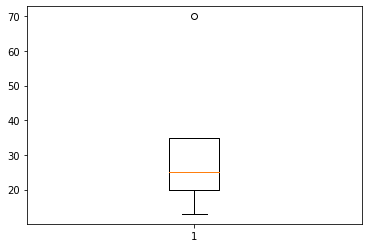

In [31]:
# use matplotlib to draw a plot box of the given data in this cell.
# more details of the drawing method can be found here:
# Documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html?highlight=boxplot#matplotlib.pyplot.boxplot
# Example: https://matplotlib.org/gallery/statistics/boxplot_demo.html
plt.boxplot(box_values)


### Question Set 2 (20 mins)
<p>Review the calculation method of approximated median in lecture slides (pages 10-11) and try to answer the following questions:<br>
<ol>
    <li>Why we need to approximately calculate median value of data? (2 mins)</li><br>    
    <li>Given the age data in <b>Question Set 1</b>, please calculate the approximated median value. (12 mins) <br>
        NOTE: age data can be divided into three intervals: a). $\leq 20$, b). $[21,30]$ c). $\geq 31$</li><br>
    <li>Compare the approximated median with the real median. (1 mins)</li><br>
    <li>Draw the histogram of age data with different number of bins. (5 mins)</li>
</ol>
</p>

In [13]:
def aprox_median(values: list, lower: float, upper: float) -> float:
    middle_interval = [x for x in values if x > lower and x < upper]
    lower_bound = min(middle_interval)
    total_set = len(values)
    Efreq = len(middle_interval) - 1 # 1 interval less than the middle
    freq_med = len(middle_interval)
    width = max(middle_interval) - min(middle_interval)
    
    return lower_bound + (((total_set/2) - Efreq)/freq_med)*width

print(aprox_median(values, 55, 81))

76.33333333333334


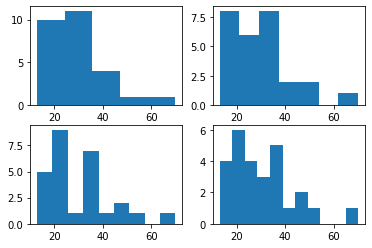

In [48]:
# use matplotlib to draw a histogram of the age data, and try to use different number of bins.
# documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
# example: https://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
total_bins = [5, 7, 9, 11]

fig, axs = plt.subplots(2,2)
count = 0
for i in range(2):
    for j in range(2):
        axs[i, j].hist(values, bins=total_bins[count])
        count += 1

### Question Set 3 (20 mins)
<p>Review the measurements dissimilarity and similarity in lecture sides (pages 34-39) and try to answer the following questions:
<br>
<ol>
    <li>Briefly describe what are similarity and dissimilarity between objects? (3 mins)</li><br>
    <li>How to represent similarity/dissimilarity among $n$ data objects? Please describe the characteristics of the representation. (3 mins)</li><br>
    <li>Give three data objects in the following table, each of which only has categorical features, calculate the dissimilarity between these objects. (5 mins) <br>
    <table style="width:80%">
      <tr><th>student_id</th><th>gender</th><th>living_region</th><th>degree</th><th>major</th><th>country</th><th>scholarship</th><th>tutor</th><th>current_yea</th></tr>      
      <tr><th>1001</th><th>M</th><th>A</th><th>bachelor</th><th>it</th><th>domestic</th><th>Y</th><th>N</th><th>1</th></tr>
<tr><th>1002</th><th>F</th><th>B</th><th>bachelor</th><th>arts</th><th>international</th><th>Y</th><th>Y</th><th>3</th></tr>
      <tr><th>1003</th><th>F</th><th>A</th><th>master</th><th>engineering</th><th>domestic</th><th>Y</th><th>Y</th><th>1</th></tr>
      <tr><th>1004</th><th>M</th><th>C</th><th>master</th><th>it</th><th>domestic</th><th>Y</th><th>N</th><th>2</th></tr>
    </table>    
    Tips: calculate dis(1001,1002), dis(1001,1003), dis(1001,1004), dis(1002,1003), dis(1002,1004), dis(1003,1004) using <b>simple match</b> method.</li><br>
    <li>Given two objects represented by the tuples (22, 1, 42, 10) and (20, 0, 36, 8), compute both the Euclidean distance and Manhattan distance between the two objects. (4 mins)</li><br>
    <li>Given five data objects in the following table, find out the neareast point in the table to the new data point $x=(1.4,1.6)$ using Euclidean distance and Manhattan distance, respectively. (5 mins)
    <table style="width:40%;border: 1px solid black;">
        <tr><th>data</th><th>$A_1$</th><th>$A_2$</th></tr>
        <tr><th>$x_1$</th><th>1.5</th><th>1.7</th></tr>
        <tr><th>$x_2$</th><th>2</th><th>1.9</th></tr>
        <tr><th>$x_3$</th><th>1.6</th><th>1.8</th></tr>
        <tr><th>$x_4$</th><th>1.2</th><th>1.5</th></tr>
        <tr><th>$x_5$</th><th>1.5</th><th>1.0</th></tr>
    </table> 
    </li><br>
</ol>
</p>

In [54]:
# Give three data objects in the following table, each of which only has categorical features, 
# calculate the dissimilarity between these objects. (5 mins) 
df = pd.read_csv('./q3data.csv')






4


In [65]:
# Given two objects represented by the tuples (22, 1, 42, 10) and (20, 0, 36, 8), compute both the Euclidean distance and Manhattan distance between the two objects. (4 mins)
def manhatten(x: list, y: list) -> float:
    result = [abs(i-j) for i,j in zip(x,y)]
    man_dist_sum = 0
    for k in result:
        man_dist_sum += k
    
    return man_dist_sum

def eucledian(x: list, y: list) -> float:
    result = [(abs(i-j))**2 for i,j in zip(x,y)]
    euc_dist_sum = 0
    for k in result:
        euc_dist_sum += k
    
    return euc_dist_sum ** 0.5

tup1 = [22, 1, 42, 10]
tup2 = [20, 0, 36, 8]

print(manhatten(tup1,tup2))
print(eucledian(tup1, tup2))

11
6.708203932499369


## 2. Data Pre-processing

### Question Set 4 (40 mins)
Review the Data Pre-processing in lecture sides (pages 42-74) and try to answer the following questions: 
<ol>
    <li>What are the major tasks in Data Pre-processing? (2 mins)</li><br>
    <li>In real-world data, data with missing values for some attributes is a common occurrence. Describe possible reasons and various methods for handling this problem. (2 mins)</li><br>
    <li>Given the age data in <b>Question Set 1</b> (13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70), please use smoothing by bin means to pre-process the data, using a bin depth of 3. Illustrate your steps. Comment on the effect of this technique for the given data and describe what other methods are available for data smoothing. (10 mins)</li><br>  
    <li>Discuss issues to consider during data integration. (2 mins)</li><br> 
    <li>Describe the strategies of data reduction. (4 mins)</li><br>    
    <li>What are the value ranges of the following normalization methods? (5 mins)</li>
     <ul>
        <li>min-max normalization</li>
        <li>z-score normalization</li>      
    </ul> <br>
    <li>Given the age data in <b>Question Set 1</b> (13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70), please normalize the data with min-max normalization method. (5 mins)</li><br>
    <li>Use z-score normalization to transform the value 35 for age, where the age mean is 29.96 and the standard deviation of age is 12.94 years. (2 mins)</li><br>
    <li>Suppose a group of 12 sales price records has been sorted as follows: (5,10,11,13,15,35,50,55,72,92,204,215). Partition them into three bins by equal-width and equal-depth partitioning methods. (8 mins)</li>
</ol>



In [19]:
# Q3
BIN_DEPTH = 3

def create_bins_of_depth(vals: list, depth: float) -> list:
    bin_list = []
    temp_bin = []
    vals.sort()
    for x in range(len(vals)):
        if x % BIN_DEPTH == 0 and x != 0:
            bin_list.append(temp_bin)
            temp_bin = []
        temp_bin.append(vals[x])
    bin_list.append(temp_bin)
    return bin_list

def smooth_bins(bins: list[list]) -> list:
    mean_of_bins = [round(mean(b)) for b in bins]
    for l in range(len(bins)):
        bins[l] = [mean_of_bins[l] for item in bins[l]]
    return bins

bin_list = create_bins_of_depth(values, BIN_DEPTH)
print(smooth_bins(bin_list))

[[41, 41, 41], [45, 45, 45], [51, 51, 51], [62, 62, 62], [77, 77, 77], [87, 87, 87], [95, 95]]


In [61]:
# Q7
vals = [200,300,400,600,1000]
MIN_VAL = min(vals)
MAX_VAL = max(vals)
NEW_MIN = 0
NEW_MAX = 1

def min_max(v: float) -> float:
    return round((((v - MIN_VAL) / (MAX_VAL - MIN_VAL)) * (NEW_MAX - NEW_MIN)) + NEW_MIN, 3)

results = [min_max(x) for x in vals]
print(results)


[0.0, 0.125, 0.25, 0.5, 1.0]


In [87]:
# Q8
def zscore(x: float, u: float, o: float) -> float:
    return (x - u) / o

print(zscore(35, 29.96, 12.94))



0.38948995363214833


In [83]:
def create_bins_by_width(vals: list, num_bins: float) -> list[list]:
    A = min(vals)
    B = max(vals)
    width = (B - A) / num_bins
    temp_bin = []
    check = 0
    isfirst = True
    first = 0
    all_bins = []
    for v in vals:
        if isfirst:
            first = v
            isfirst = False
        
        temp_bin.append(v)
        check = first - v
        if check >= width:
            all_bins.append(temp_bin)
            check = 0
            isfirst = True
            temp_bin = []
    return all_bins

In [84]:
# Q9
q9_vals = [41,41,42,43,45,46,49,50,55,58,61,66,73,79,80,85,87,89,92,98]

TOTAL_BINS = 4
BIN_DEPTH = len(q9_vals) / TOTAL_BINS

print(create_bins_of_depth(q9_vals, BIN_DEPTH))
print(create_bins_by_width(q9_vals, 4))

[[41, 41, 42, 43, 45], [46, 49, 50, 55, 58], [61, 66, 73, 79, 80], [85, 87, 89, 92, 98]]
[]


In [34]:
d1 = [4,1,5,6,8,2,4,6,1]
d2 = [0,1,3,3,9,0,4,2,5]

def get_vector_len(dataset: list)-> float:
    counter = 0
    for i in dataset:
        counter += i
    return counter ** 0.5
    

def cosine(set1: list, set2: list) -> float:
    dot_product_values = [x*y for x, y in zip(set1,set2)]
    dot_product = sum(dot_product_values)

    vectorlen_1 = get_vector_len(set1)
    vectorlen_2 = get_vector_len(set2)
    
    return dot_product / (vectorlen_1 * vectorlen_2)
        

print(cosine(d1, d2))

4.397765380319912


# Activity Set 2: Coding Practice (extras for homework) [<font color=red>Individual Activity</font>] 

You need to code to address the following problems:
<ol>
    <li>Load raw_bank_data.csv dataset.</li>
    <li>Check what types of attributes are available in the data.</li>
    <li>Check statistical information of numerical attributes.</li>
    <li>Check if there are missing data and noise for attributes.</li>
    <li>Choose mean or median values to fill the missing data.</li>
    <li>Drop those data records whose last column ("y") is missing.</li> 
    <li>Need to drop two columns "day" and "month".</li>
    <li>Normalize the categorical features using one-hot method.</li>   <font color=green>  
    <b>Below tasks are optional activities for 3031ICT/7031ICT students:   
    <li>Use K-NN as a classifier to predict if the customer is going to have a deposit.</li>
    <li>Normalize the data using min-max scale and then perform the K-NN above again.</li>     
</ol>